# Real Estate valuation House Price Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel('Real estate valuation data set.xlsx')

# Exploratory data analysis(EDA)


# Questions to answer

In [3]:
df.head()

X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0          2012.916667          32.0                                84.87882   
1          2012.916667          19.5                               306.59470   
2          2013.583333          13.3                               561.98450   
3          2013.500000          13.3                               561.98450   
4          2012.833333           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1                        42.2  
2                        47.3  
3                        54.8  
4                        43.1

# Description of the columns

In [4]:
df.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [5]:
df.describe()

X1 transaction date  X2 house age  \
count           414.000000    414.000000   
mean           2013.148953     17.712560   
std               0.281995     11.392485   
min            2012.666667      0.000000   
25%            2012.916667      9.025000   
50%            2013.166667     16.100000   
75%            2013.416667     28.150000   
max            2013.583333     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  X6 longitude  \
count                       414.000000   414.000000    414.000000   
mean                          4.094203    24.969030    121.533361   
std                           2.945562     0.012410      0.015347   
min                           0.000000    24.932070    121.473530   
25%                           1.000000    24.963000    121.528085   
50%                           4.000000    24.971100    121.538630   
75%                           6.000000    24.977455    121.543305   
max                          10.000000    25.014590    121.566270   

       Y house price of unit area  
count                  414.000000  
mean                    37.980193  
std                     13.606488  
min                      7.600000  
25%                     27.700000  
50%                     38.450000  
75%                     46.600000  
max                    117.500000

In [6]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [7]:
df.dtypes

X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [8]:
df.shape

(414, 7)

array([[<AxesSubplot:title={'center':'X1 transaction date'}>,
        <AxesSubplot:title={'center':'X2 house age'}>,
        <AxesSubplot:title={'center':'X3 distance to the nearest MRT station'}>],
       [<AxesSubplot:title={'center':'X4 number of convenience stores'}>,
        <AxesSubplot:title={'center':'X5 latitude'}>,
        <AxesSubplot:title={'center':'X6 longitude'}>],
       [<AxesSubplot:title={'center':'Y house price of unit area'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

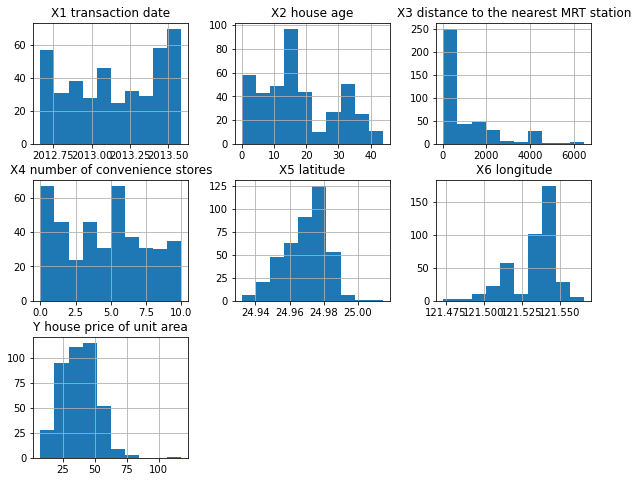

In [9]:
df.hist(figsize=(10,8))

In [10]:
from pandas_profiling import ProfileReport

In [11]:
Profile=ProfileReport(df)
Profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

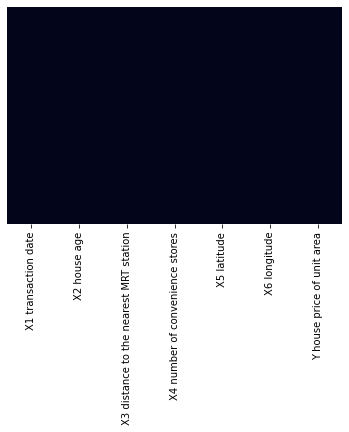

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [14]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
409    False
410    False
411    False
412    False
413    False
Length: 414, dtype: bool

In [15]:
df.dtypes

X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [16]:
df['X1 transaction date'].unique()

array([2012.9166667, 2013.5833333, 2013.5      , 2012.8333333,
       2012.6666667, 2013.4166667, 2013.0833333, 2013.3333333,
       2013.25     , 2012.75     , 2013.       , 2013.1666667])

In [17]:
df['X2 house age'].unique()

array([32. , 19.5, 13.3,  5. ,  7.1, 34.5, 20.3, 31.7, 17.9, 34.8,  6.3,
       13. , 20.4, 13.2, 35.7,  0. , 17.7, 16.9,  1.5,  4.5, 10.5, 14.7,
       10.1, 39.6, 29.3,  3.1, 10.4, 19.2, 25.9, 29.6, 37.9, 16.5, 15.4,
       13.9, 12. , 16.2, 13.6, 16.8, 36.1, 34.4,  2.7, 36.6, 21.7, 35.9,
       24.2, 29.4, 31.3, 32.1, 16.1, 33.6,  3.5, 30.3, 11. ,  5.3, 17.2,
        2.6, 17.5, 40.1,  1. ,  8.5, 30.4, 12.5,  6.6, 35.5, 32.5, 13.8,
        6.8, 12.3, 20.5, 38.2, 18. , 11.8, 30.8, 25.3, 15.1,  1.8,  8.9,
       23. ,  9.1, 20.6, 31.9, 40.9,  8. ,  6.4, 28.4, 16.4, 12.7,  1.1,
       32.7, 12.2, 31.4,  4. ,  8.1, 33.3,  9.9, 14.8, 30.6, 30.9, 16.6,
       31.5, 38.6,  3.8, 41.3, 38.5, 26.6, 33.4, 18.9, 11.4, 10. , 12.9,
        5.1, 19.8, 11.9,  2.1,  3.2, 34.9, 35.8,  4.9,  6.5, 30.7, 11.6,
       15.5, 16. , 13.7, 28.2, 27.6,  8.4, 24. ,  3.6,  4.3, 30.2, 33. ,
       13.1, 14. , 26.9, 13.5, 17. , 14.1, 20.9, 16.3, 35.3, 43.8,  9.7,
       15.2, 22.8, 34. , 18.2, 17.4, 38.3, 15.6, 12

In [18]:
df['X3 distance to the nearest MRT station'].unique()

array([  84.87882,  306.5947 ,  561.9845 ,  390.5684 , 2175.03   ,
        623.4731 ,  287.6025 , 5512.038  , 1783.18   ,  405.2134 ,
         90.45606,  492.2313 , 2469.645  , 1164.838  ,  579.2083 ,
        292.9978 ,  350.8515 ,  368.1363 ,   23.38284, 2275.877  ,
        279.1726 , 1360.139  ,  480.6977 , 1487.868  ,  383.8624 ,
        276.449  ,  557.478  ,  451.2438 , 4519.69   ,  769.4034 ,
        488.5727 ,  323.655  ,  205.367  , 4079.418  , 1935.009  ,
        577.9615 ,  289.3248 , 4082.015  , 4066.587  ,  519.4617 ,
        512.7871 ,  533.4762 ,  488.8193 ,  463.9623 ,  640.7391 ,
       4605.749  , 4510.359  ,  512.5487 , 1758.406  , 1438.579  ,
       1160.632  ,  371.2495 ,   56.47425,  336.0532 , 1931.207  ,
        259.6607 , 2175.877  ,  995.7554 ,  123.7429 ,  193.5845 ,
        104.8101 ,  464.223  ,  424.5442 ,  379.5575 ,  616.4004 ,
       2185.128  ,  552.4371 , 1414.837  ,  377.7956 ,  150.9347 ,
       2707.392  ,  383.2805 ,  338.9679 , 1455.798  , 1406.43

In [19]:
df['X4 number of convenience stores'].unique()

array([10,  9,  5,  3,  7,  6,  1,  4,  2,  8,  0], dtype=int64)

In [20]:
df['X5 latitude'].unique()

array([24.98298, 24.98034, 24.98746, 24.97937, 24.96305, 24.97933,
       24.98042, 24.95095, 24.96731, 24.97349, 24.97433, 24.96515,
       24.96108, 24.99156, 24.9824 , 24.97744, 24.97544, 24.9675 ,
       24.96772, 24.96314, 24.97528, 24.95204, 24.97353, 24.97542,
       24.98085, 24.95593, 24.97419, 24.97563, 24.94826, 24.98281,
       24.97841, 24.98419, 25.01459, 24.96386, 24.97201, 24.98203,
       24.94155, 24.94297, 24.98748, 24.97445, 24.97015, 24.9703 ,
       24.94684, 24.94925, 24.974  , 24.95402, 24.94968, 24.97254,
       24.95744, 24.95776, 24.96365, 24.97585, 24.96303, 24.97635,
       24.96571, 24.96674, 24.97964, 24.97587, 24.98343, 24.97723,
       24.96322, 24.97598, 24.95182, 24.96427, 24.96725, 24.96056,
       24.96735, 24.96853, 24.9512 , 24.98573, 24.94783, 24.9748 ,
       24.98569, 24.9492 , 24.9663 , 24.97746, 24.98872, 24.97371,
       24.95618, 24.96398, 24.97707, 24.9726 , 24.96299, 24.97701,
       24.96044, 24.96172, 24.98155, 24.98092, 24.94375, 24.93

In [21]:
df['X6 longitude'].unique()

array([121.54024, 121.53951, 121.54391, 121.54245, 121.51254, 121.53642,
       121.54228, 121.48458, 121.51486, 121.53372, 121.5431 , 121.53737,
       121.51046, 121.53406, 121.54619, 121.54458, 121.53119, 121.54451,
       121.54102, 121.51151, 121.54541, 121.54842, 121.53885, 121.51726,
       121.53913, 121.53797, 121.54694, 121.49587, 121.53408, 121.53451,
       121.54281, 121.54243, 121.51816, 121.51458, 121.54722, 121.54348,
       121.50381, 121.50342, 121.53758, 121.54301, 121.54765, 121.54494,
       121.53715, 121.49578, 121.49542, 121.53842, 121.55282, 121.5175 ,
       121.53009, 121.54059, 121.53711, 121.53438, 121.51471, 121.54516,
       121.54915, 121.54329, 121.54089, 121.54067, 121.53805, 121.53762,
       121.53767, 121.51237, 121.53381, 121.54887, 121.53964, 121.54252,
       121.50831, 121.54464, 121.54413, 121.549  , 121.52758, 121.50243,
       121.53059, 121.5276 , 121.53076, 121.54026, 121.53299, 121.53411,
       121.52984, 121.53844, 121.5425 , 121.54308, 

In [22]:
df['Y house price of unit area'].unique()

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  25. ,  34.2,  49.3,  55.1,  27.3,  22.9,
        25.3,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,  38.3,  42. ,
        61.5,  13.4,  13.2,  44.2,  20.7,  38.9,  51.7,  13.7,  41.9,
        53.5,  22.6,  42.4,  21.3,  63.2,  27.7,  55. ,  44.3,  50.7,
        56.8,  36.2,  59. ,  40.8,  36.3,  20. ,  54.4,  29.5,  36.8,
        25.6,  29.8,  26.5,  48.1,  17.7,  43.7,  50.8,  18.3,  48. ,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  45.7,  30.5,  71. ,  47.1,  26.6,  28.4,
        39.4,  23.1,   7.6,  53.3,  46.4,  12.2,  13. ,  30.6,  59.6,
        31.3,  32.5,  45.5,  57.4,  48.6,  62.9,  60.7,  37.5,  30.7,
        39.5,  20.8,  46.8,  47.4,  43.5,  42.5,  51.4,  28.9,  40.1,
        52.2,  45.1,

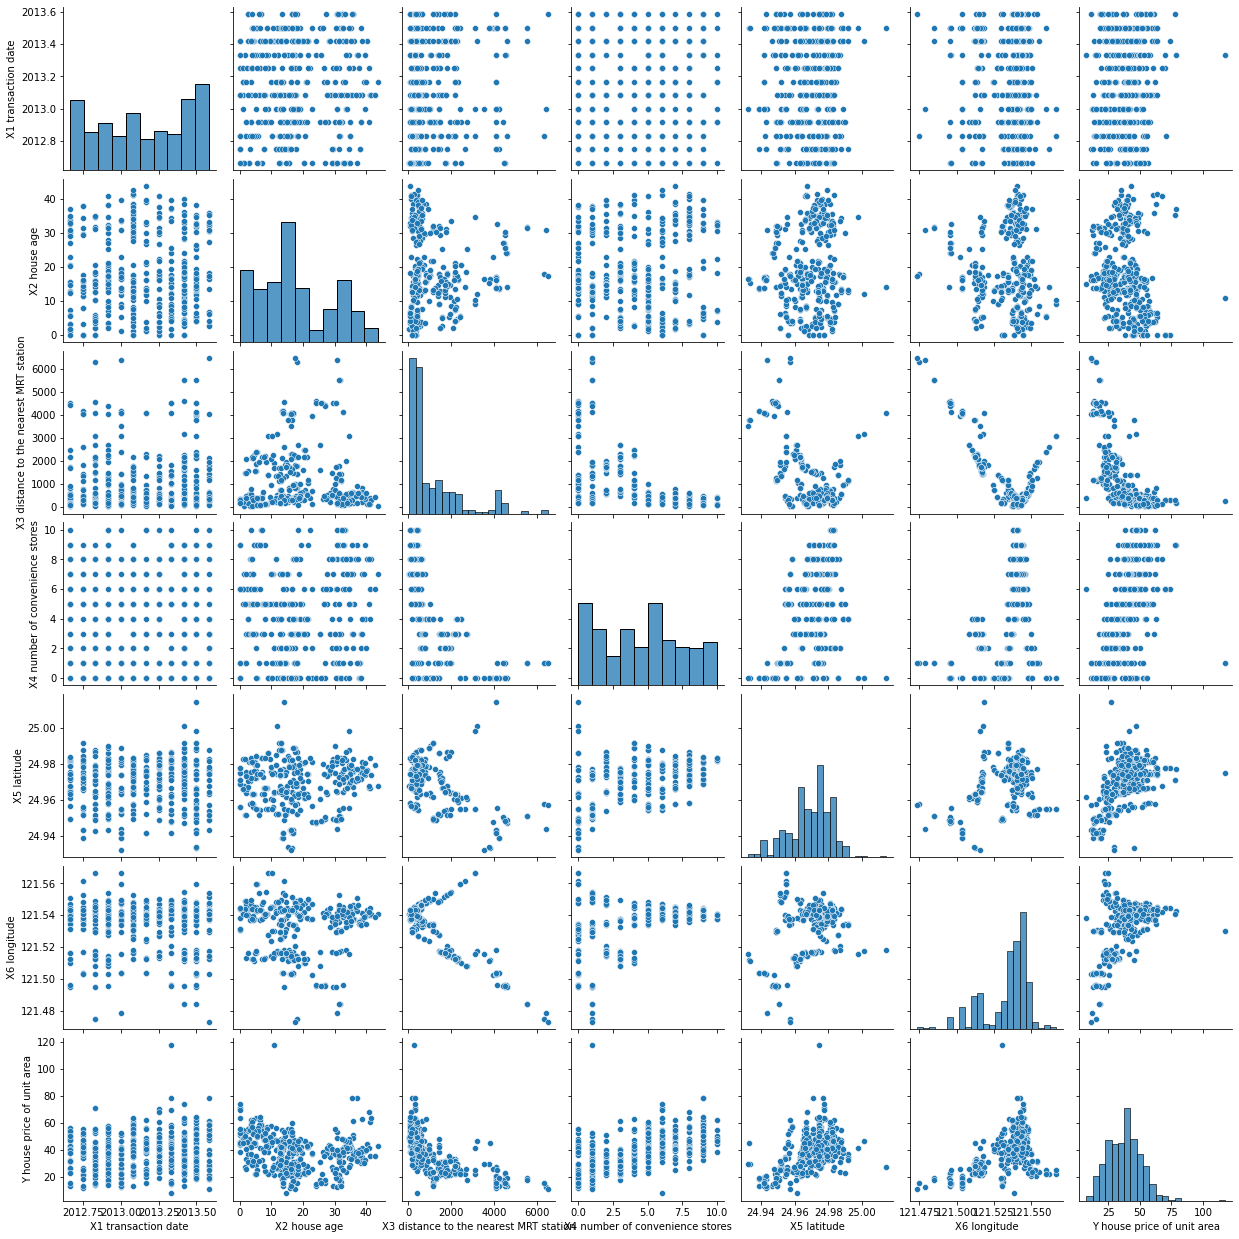

In [23]:
sns.pairplot(df)

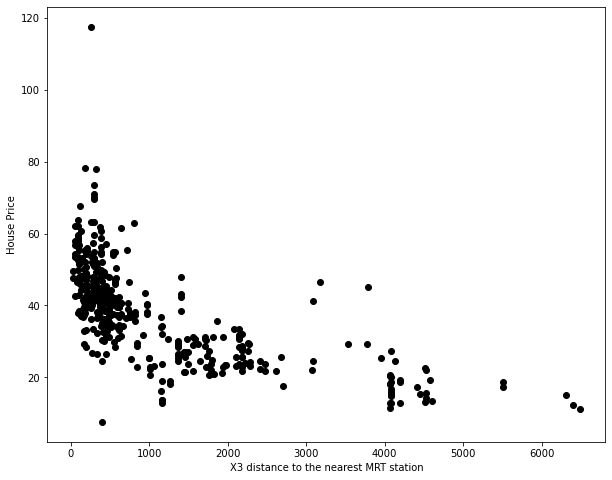

In [47]:
plt.figure(figsize=(10,8))
plt.scatter(df['X3 distance to the nearest MRT station'], df['Y house price of unit area'], c='black')
plt.xlabel('X3 distance to the nearest MRT station')
plt.ylabel('House Price')
plt.show()

Scatter diagram to show the relationship between X1 transaction date and Y house price of unit area

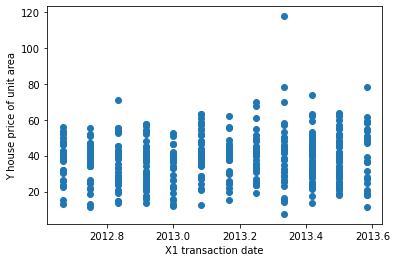

In [25]:
plt.scatter(df['X1 transaction date'], df['Y house price of unit area'])
plt.xlabel('X1 transaction date')
plt.ylabel('Y house price of unit area')
plt.show()

Drawing a Histogram For the house Price unit Area

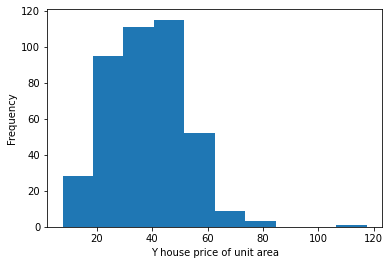

In [26]:
plt.hist(df['Y house price of unit area'])
plt.xlabel('Y house price of unit area')
plt.ylabel('Frequency')
plt.show()

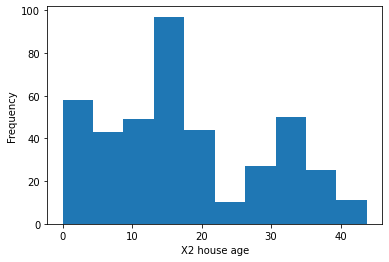

In [27]:
plt.hist(df['X2 house age'])
plt.xlabel('X2 house age')
plt.ylabel('Frequency')
plt.show()

Most Houses in the dataset are of ages beteew 0 years and25 years

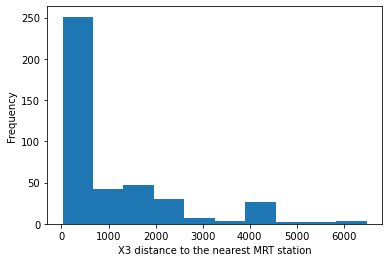

In [28]:
plt.hist(df['X3 distance to the nearest MRT station'])
plt.xlabel('X3 distance to the nearest MRT station')
plt.ylabel('Frequency')
plt.show()

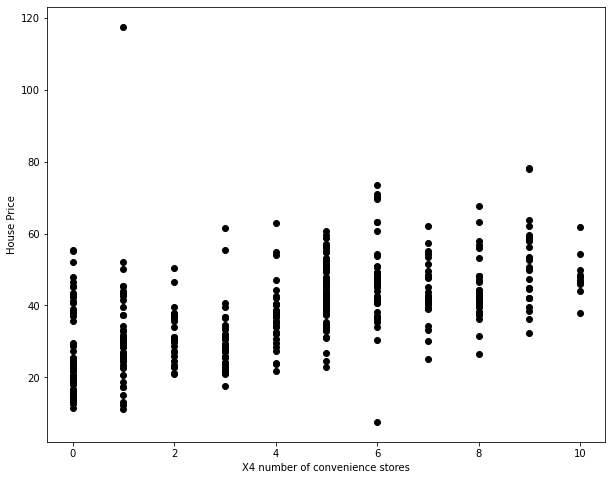

In [44]:
plt.figure(figsize=(10,8))
plt.scatter(df['X4 number of convenience stores'], df['Y house price of unit area'], c='black')
plt.xlabel('X4 number of convenience stores')
plt.ylabel('House Price')
plt.show()

As the number of convenience  stores increses, the cost of a House increases.

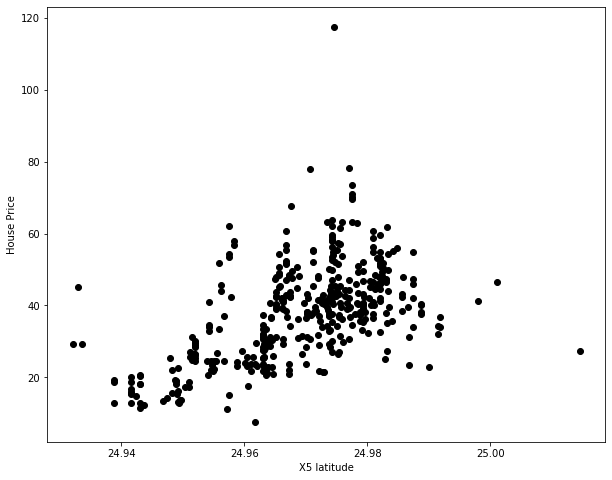

In [45]:
plt.figure(figsize=(10,8))
plt.scatter(df['X5 latitude'], df['Y house price of unit area'], c='black')
plt.xlabel('X5 latitude')
plt.ylabel('House Price')
plt.show()

The cost of Houses is High at medium latitudes  and low in The extreme low  latitudes

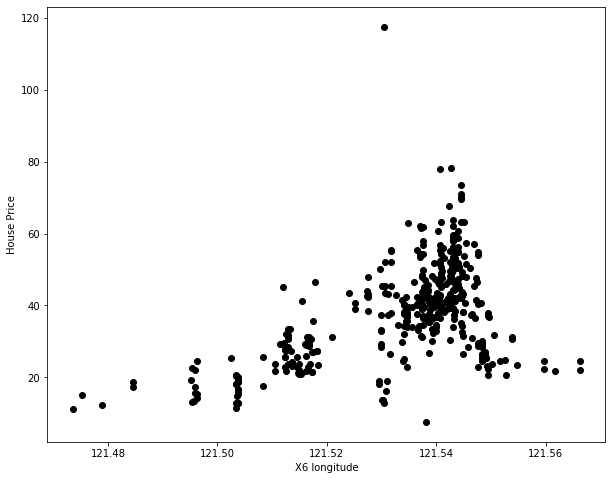

In [46]:
plt.figure(figsize=(10,8))
plt.scatter(df['X6 longitude'], df['Y house price of unit area'], c='black')
plt.xlabel('X6 longitude')
plt.ylabel('House Price')
plt.show()

The cost of Houses is Higher at longitudes between 121.52 and 121.54(degrees)

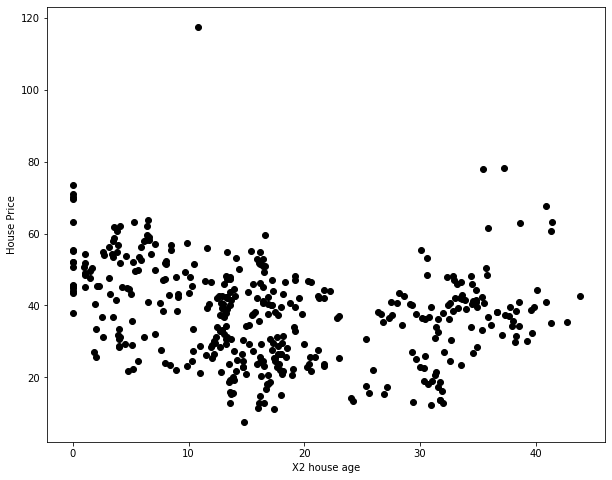

In [48]:
plt.figure(figsize=(10,8))
plt.scatter(df['X2 house age'], df['Y house price of unit area'], c='black')
plt.xlabel('X2 house age')
plt.ylabel('House Price')
plt.show()

# Key Findings 

Drawing a Correlation matix to show the relationship between the different variables in the dataset

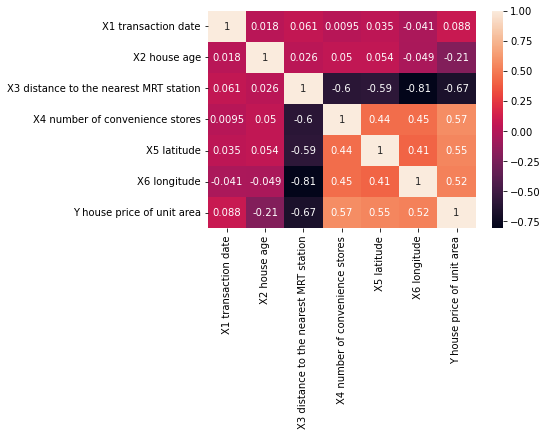

In [29]:
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.show()

In [30]:
df.head()

X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0          2012.916667          32.0                                84.87882   
1          2012.916667          19.5                               306.59470   
2          2013.583333          13.3                               561.98450   
3          2013.500000          13.3                               561.98450   
4          2012.833333           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1                        42.2  
2                        47.3  
3                        54.8  
4                        43.1

# Machine learning

# Linear Regression

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Split the data into train and test sets

In [32]:
x = df.drop('Y house price of unit area', axis = 1)
y = df['Y house price of unit area']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 42)

#Train the linear model
model = LinearRegression()
model.fit(x_train, y_train)

#make predictions on the model
y_pred = model.predict(x_train)

#Evaluate the model using Mean_squared_Error
mse = mean_squared_error(y_train, y_pred)
print('mean squared Error:', mse)


mean squared Error: 83.11097569290197


# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
#Split the data into training and testing sets
x = df.drop('Y house price of unit area', axis = 1)
y = df['Y house price of unit area']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#Train the decision tree regression model
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

#Make predictions on the test set
dt_y_pred = dt_model.predict(x_test)

#Evaluate the model using the mean squared error
dt_mse = mean_squared_error(y_test, dt_y_pred)
print("Decision Tree Mean squared Error:", dt_mse)

Decision Tree Mean squared Error: 59.27915662650604


# Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
x = df.drop("Y house price of unit area", axis = 1)
y = df['Y house price of unit area']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#Train the Random Forest regression model
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

#Make predictions on the test set
rf_y_pred = rf_model.predict(x_test)

#Evaluate the model using mean squared error
rf_mse = mean_squared_error(y_test, rf_y_pred)
print("Random Forest regreessor:",rf_mse)

Random Forest regreessor: 33.18812788271419


# LightGBM

In [37]:
import lightgbm as lgb

In [38]:
x = df.drop('Y house price of unit area', axis = 1)
y = df['Y house price of unit area']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#Convert the training and test data sets into lightgbm datasets
lgb_train = lgb.Dataset(x_train, y_train)
lgb_test = lgb.Dataset(x_test, y_test)

#Define the lightGbm model Parameters
params = {
    'boosting_type': 'gbdt',
    'objective':'regression',
    'metric':'mse'
}

#train the lightGbm model
gbm = lgb.train(params, lgb_train, num_boost_round=100)


# Make predictions on the test set
lgb_y_pred = gbm.predict(x_test)

# Evaluate the model using mean squared error
lgb_mse = mean_squared_error(y_test, lgb_y_pred)
print("LightGBM Mean Squared Error:", lgb_mse)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 379
[LightGBM] [Info] Number of data points in the train set: 331, number of used features: 6
[LightGBM] [Info] Start training from score 38.391541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

# Ridge Regression

In [39]:
from sklearn.linear_model import Ridge

In [40]:
x = df.drop('Y house price of unit area', axis = 1)
y = df['Y house price of unit area']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

#Train the ridge regressor model
ridge_reg = Ridge()
ridge_reg.fit(x_train, y_train)

#Make predictions on the test set
ridge_y_pred = ridge_reg.predict(x_test)

#Evaluate the model using mean squared error
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
print("Ridge Regressor Mean Squared Error:", ridge_mse)

Ridge Regressor Mean Squared Error: 75.67818462108882


# Lasso Regressor

In [41]:
from sklearn.linear_model import Lasso

In [42]:
lasso = Lasso()
x = df.drop('Y house price of unit area', axis = 1)
y = df['Y house price of unit area']

x_train, x_test, y_train, y_test =train_test_split(x, y, test_size = 0.2, random_state = 42)

#Train and fit the Lasso Model
lasso.fit(x_train, y_train)

#Make predictions on the test set
lasso_y_pred = lasso.predict(x_test)

#Evaluate the model using mean squared error
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
print("Lasso regressor Mean squred Error:", lasso_mse)


Lasso regressor Mean squred Error: 59.5596241402479


# Compiling The results

In [43]:
rmse_compilation = {
    'model':['Linear Regression','Decision Tree',
              'Random Forest','LightGBM','Ridge Regression','Lasso Regression'],
'RMSE':[83.1109, 67.2468, 33.4949, 32.9152, 75.6782, 59.5596]
}
rmse_df = pd.DataFrame(data =rmse_compilation)
rmse_df.sort_values(by = ['RMSE'], ascending=True)

model     RMSE
3           LightGBM  32.9152
2      Random Forest  33.4949
5   Lasso Regression  59.5596
1      Decision Tree  67.2468
4   Ridge Regression  75.6782
0  Linear Regression  83.1109

The best performing model is LightGBM because it has the least Mean squared error